In [ ]:
Function Transformer =>
                        Function Transformer is a tool that apply specific transformation on your data apply. In this case
                        you have also normalize,and other transform scale on data.its that easy to apply model in machine learning 

Log Transform =>
                Log transformation ek commonly used technique hai jo data ko preprocess karne ke liye use hoti hai. 
                Isse data ka variance stabilize ho jata hai, data zyada normally distributed ho jata hai, aur outliers ka effect kam ho jata hai.
                Hum np.log1p use karte hain jo input array elements ka natural logarithm compute karta hai aur zero values ko handle karta hai.

In [ ]:
Log Transformation Step-by-Step Example =>
                                           1. Libraries Import Karna

                                           2. Log Transformation Function Define Karna

                                           3. Function Transformer Create Karna

                                           4. Transformer Apply Karna Data Pe

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from scipy.stats import skew, probplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
c = pd.read_csv(r"C:\Users\Lenovo\Desktop\gaurav\tips.csv")
c.head()
# Select relevant columns
d = c[["total_bill","tip","size"]]
# null values number
d.isnull().sum()

total_bill    0
tip           0
size          0
dtype: int64

In [ ]:
""" if null value present so handle them in this data no null value """
# Handle missing values
d['total_bill'].fillna(df['total_bill'].median(), inplace=True)
d['tip'].fillna(df['tip'].median(), inplace=True)

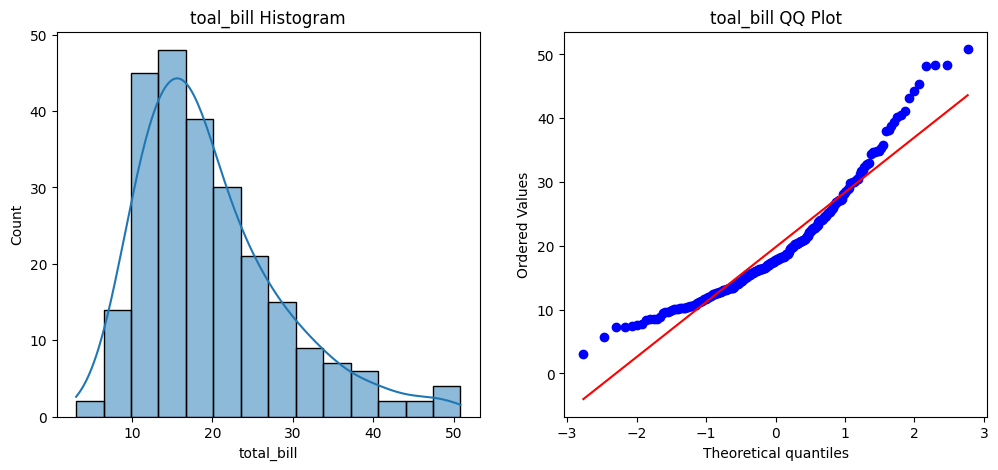

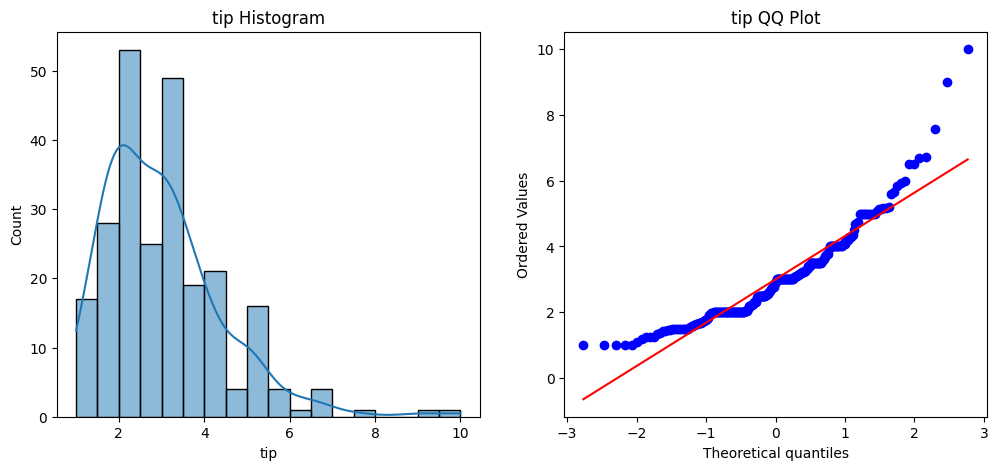

In [18]:
def plot_skewness(data, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'{title} Histogram')

    plt.subplot(1, 2, 2)
    probplot(data, dist="norm", plot=plt)
    plt.title(f'{title} QQ Plot')

    plt.show()

plot_skewness(d['total_bill'], 'toal_bill')
plot_skewness(d['tip'], 'tip')

In [20]:
# Splitting the data into training and test sets
X = d[['total_bill', 'tip']]
y = d['size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Logistic Regression without log transformation
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_without_log = accuracy_score(y_test, y_pred)
print(f'Accuracy without log transformation: {accuracy_without_log}')


Accuracy without log transformation: 0.673469387755102


In [23]:
# Log transformation function
def log_transform(x):
    return np.log1p(x)  # log(1 + x) to handle zero values

# Create the FunctionTransformer
log_transformer = FunctionTransformer(log_transform, validate=True)

In [24]:
# Apply log transformation to Age and Fare
X_log_transformed = log_transformer.fit_transform(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_transformed, y, test_size=0.2, random_state=42)

In [25]:
# Logistic Regression with log transformation
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)
accuracy_with_log = accuracy_score(y_test_log, y_pred_log)
print(f'Accuracy with log transformation: {accuracy_with_log}')

Accuracy with log transformation: 0.6326530612244898


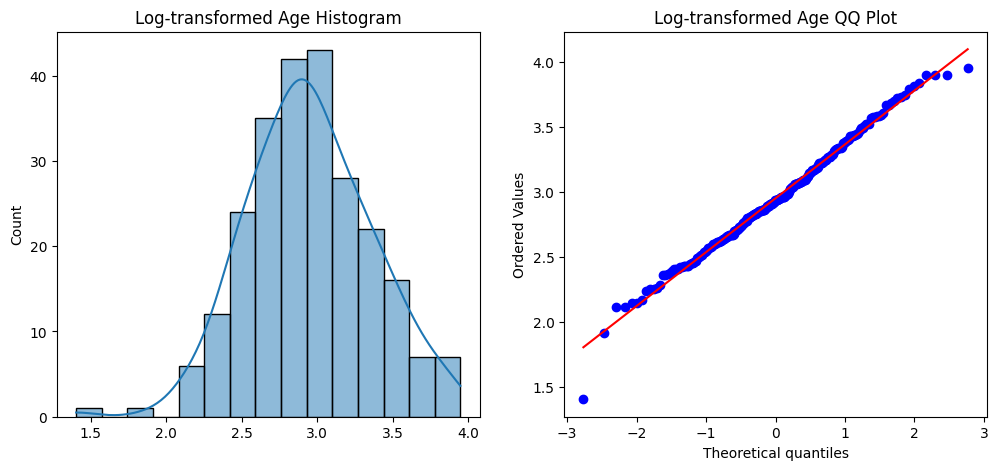

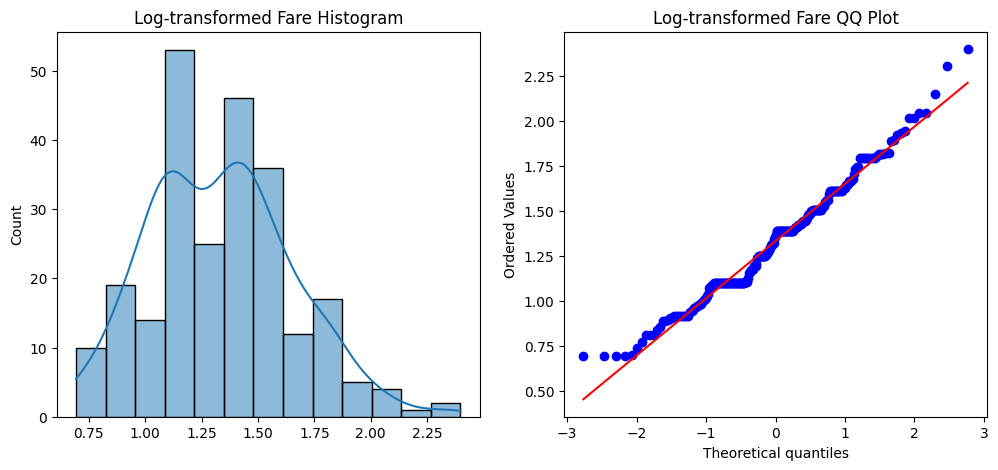

In [26]:
# Plotting the transformed histograms and QQ plots
plot_skewness(X_log_transformed[:, 0], 'Log-transformed Age')
plot_skewness(X_log_transformed[:, 1], 'Log-transformed Fare')